In [6]:
using InfiniteOpt
using JuMP, Ipopt
using Interpolations
using Plots

Simulating the tank volume where there is a flow rate based on a certain time profile into a tank
$$
\frac{dV}{dt} = q(t)
$$

In [16]:
# flowrate into tank
tchg = [0.0, 1.9, 2.0, 6.9, 7.0, 11.9, 12.0, 100.0]
qchg = [1.0, 1.0, 0.0, 0.0, 5.0, 5.0, 0.0, 0.0]

8-element Vector{Float64}:
 1.0
 1.0
 0.0
 0.0
 5.0
 5.0
 0.0
 0.0

In [32]:
# interpolated flowrate into tank
qint = LinearInterpolation(tchg, qchg)

8-element extrapolate(interpolate((::Vector{Float64},), ::Vector{Float64}, Gridded(Linear())), Throw()) with element type Float64:
 1.0
 1.0
 0.0
 0.0
 5.0
 5.0
 0.0
 0.0

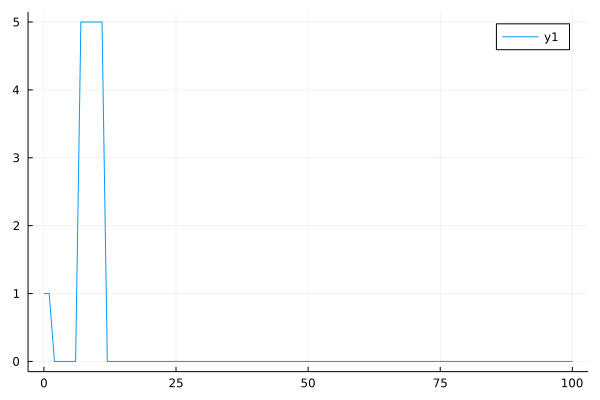

In [37]:
# plot of flowrate into tank vs time
tsim = 0.0:1.0:100.0
qsim = [qint(t) for t in tsim]
plot(tsim, qsim)

In [36]:
opt = Ipopt.Optimizer    
m = InfiniteModel(opt)

An InfiniteOpt Model
Feasibility problem with:
Finite Parameters: 0
Infinite Parameters: 0
Variables: 0
Derivatives: 0
Measures: 0
Optimizer model backend information: 
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt

In [39]:
tlist = collect(0.0:1.0:100.0)
@infinite_parameter(m, t in [0, 100.0], supports = tlist)

t

In [41]:
@variable(m, V, Infinite(t))

V(t)

In [42]:
@constraint(m, @deriv(V, t) == qint(t))

LoadError: MethodError: no method matching (::Interpolations.Extrapolation{Float64, 1, Interpolations.GriddedInterpolation{Float64, 1, Float64, Gridded{Linear{Throw{OnGrid}}}, Tuple{Vector{Float64}}}, Gridded{Linear{Throw{OnGrid}}}, Throw{Nothing}})(::GeneralVariableRef)
Use square brackets [] for indexing an Array.
[0mClosest candidates are:
[0m  (::Interpolations.Extrapolation{T, N, ITPT, IT, ET} where {ITPT, IT, ET})([91m::Number...[39m) where {T, N} at /home/paperspace/.julia/packages/Interpolations/Glp9h/src/extrapolation/extrapolation.jl:45
[0m  (::Interpolations.Extrapolation{T, N, ITPT, IT, ET} where {ITPT, IT, ET})([91m::Union{Number, AbstractVector{T} where T}...[39m) where {T, N} at /home/paperspace/.julia/packages/Interpolations/Glp9h/src/extrapolation/extrapolation.jl:54